In [1]:
#LSTM 사용하여 버튼 하나의 x좌표 예측

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    
    return numpy.array(dataX), numpy.array(dataY)

In [3]:
numpy.random.seed(7) #결과를 재현할 수 있도록 난수 시드 수정
data1=pd.read_excel('x_data.xls') #x좌표 엑셀 데이터 불러옴 

dataframe=pd.DataFrame(data1)
dataset = dataframe.values #데이터 프레임에서 numpy배열 추출
dataset = dataset.astype('float32') #정수값을 부동 소수점 값으로 변환
# LSTM 은 S자형(기본값) 또는 tanh활성화 기능을 사용할 떄 입력 데이터의 스케일에 민감
scaler = MinMaxScaler(feature_range=(0, 1)) #정규화함 (0에서 1까지의 범위로 데이터 크기 조정)
dataset = scaler.fit_transform(dataset.reshape(-1,1))
#reshape함수를 사용하여 1차원 데이터를 2차원으로 변경

train_size = int(len(dataset) * 0.67) #학습 데이터 67%
test_size = len(dataset) - train_size #테스트 데이터 33%
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#두개의 인수, 데이터 세트로 변환하려는 Numpt 배열인 dataset과 다음 시간을 예측하기
#위해 입력 변수로 사용할 이전 시간 단계 수인 look_back을 사용. 기본값을 1

look_back = 1 #이전 시간 단계 입력변수
#X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# LSTM 모델은 입력데이터 X에 [samples, time steps, features]형식으로 넣어야함
# 현재 데이터는 [samples, features]이므로, numpy.reshape()를 사용하여
#준비된 train과 test 입력 데이터를 3차원으로 바꿈
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [4]:
# LSTM 모델 
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2) #epochs값은 원래 100인데, 빠른 확인을 위해 5로 잠시 조정함
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) 

Epoch 1/5
 - 18s - loss: 2.0498e-04
Epoch 2/5
 - 18s - loss: 1.2304e-05
Epoch 3/5
 - 18s - loss: 1.2342e-05
Epoch 4/5
 - 18s - loss: 1.2307e-05
Epoch 5/5
 - 18s - loss: 1.2163e-05


In [5]:
# 예측
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.45 RMSE
Test Score: 22.34 RMSE


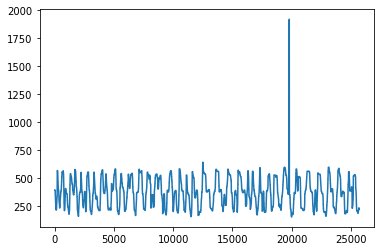

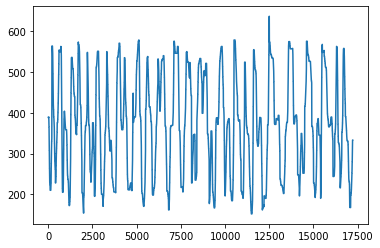

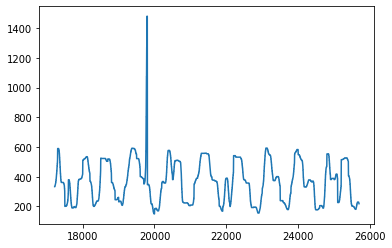

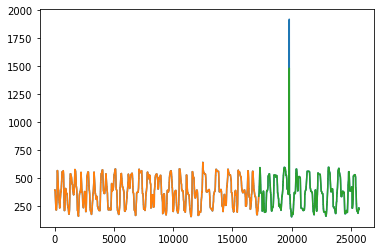

In [6]:
#원래 데이터셋 : 파란색, 테스트 데이터셋 : 녹색 #훈련 데이터셋 : 주황색
#train 예측 
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset)) #전체 데이터
plt.show()
plt.plot(trainPredictPlot) #초반 부분 train 데이터
plt.show()
plt.plot(testPredictPlot) #후반 부분 test 데이터
plt.show()

plt.plot(scaler.inverse_transform(dataset)) #전체 데이터
plt.plot(trainPredictPlot) #초반 부분 train 데이터
plt.plot(testPredictPlot) #후반 부분 test 데이터
plt.show()